<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а также обосновать корректность его работы.

При этом нужно защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. В качестве алгоритма машинного обучения будет использоваться линейная регрессия.

Для решения задачи мы будем применять матричные операции к данным, а именно умножение имеющихся признаков на некую матрицу. Данный подход должен трансформировать персональную информацию так, что простая интерпретация её станет невозможной.

План достижения цели:

 - загрузить и изучить данные;
 - проверить, на какой тип матрицы можно умножить данные так, чтоб потом их   можно было без потери информации восстановить;
 - написать алгоритм шифрования данных, убедиться в его работоспособности; проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2
 - подвести итоги.

## Загрузка данных

Импортируем необходимые для работы библиотеки и модули:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

STATE = 12345

In [2]:
def df_info(dataframe):
    print('Общая информация по датафрейму:')
    display(dataframe.info())
    print('\nПервые 10 строк:')
    display(dataframe.head(10))
    print('\nПоследние 10 строк:')
    display(dataframe.tail(10))
    print('\nПропуски:')
    display(dataframe.isnull().sum().sort_values(ascending=False))
    print('\nОписание датафрейма:')
    display(dataframe.describe())
    print('\nКоличество дубликатов:')
    display(dataframe.duplicated().sum())    

In [3]:
df= pd.read_csv('insurance.csv')
    
df_info(df)

Общая информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None


Первые 10 строк:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0



Последние 10 строк:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4990,0,22.0,56800.0,1,0
4991,0,21.0,38300.0,3,0
4992,0,45.0,54600.0,0,1
4993,1,32.0,36000.0,1,0
4994,1,26.0,51400.0,0,0
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0



Пропуски:


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


Описание датафрейма:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Количество дубликатов:


153

 Удалим явные дубликаты

In [4]:
df.drop_duplicates(inplace=True)

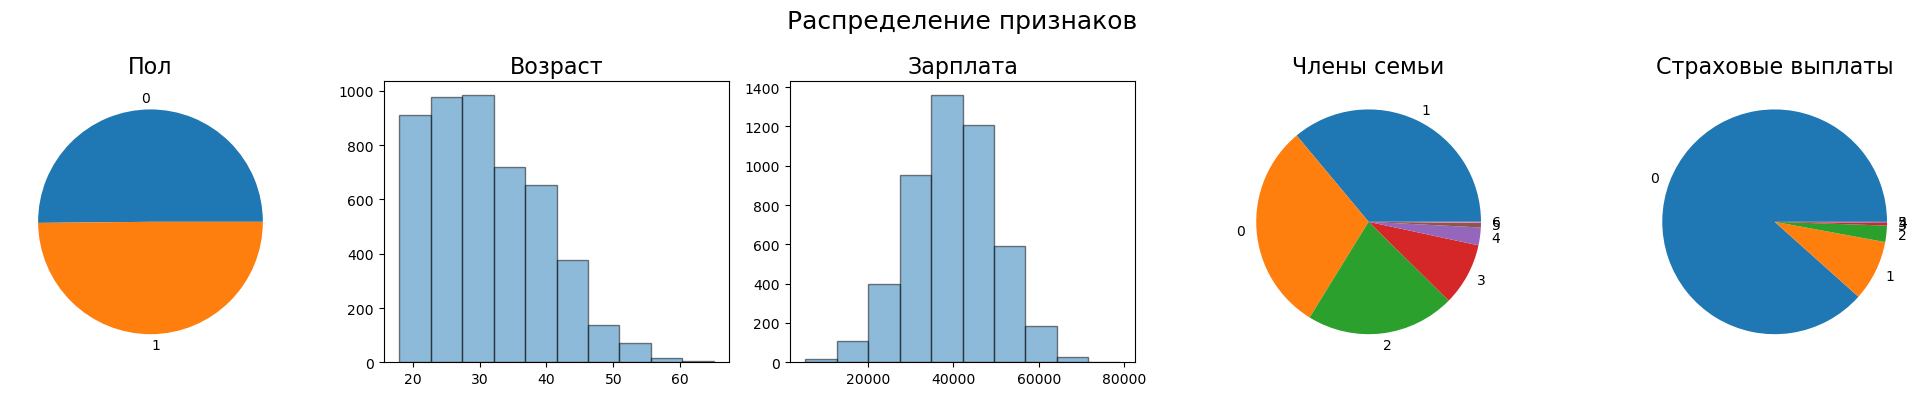

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Раcпределение признаков', fontsize=18)
for i, col in enumerate(df.columns):
    unique_values = df[col].nunique()
    if unique_values > 10:
        axs[i].hist(df[col], alpha=0.5, edgecolor='black')
    elif unique_values < 10:
        value_counts = df[col].value_counts()
        axs[i].pie(value_counts.values, labels=value_counts.index)
    axs[i].set_title(col, fontsize=16)
fig.tight_layout()
plt.show()

Промежуточные выводы по результатам изучения данных:  
Имеем 5000 объектов, 4 признака и 1 таргет.   
Все признаки, числовые, значения и распределение не вызывают сомнений.  
Пропусков в данных нет, 153 явных дубликата удалили.  

## Умножение матриц

Проведём исследование, изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу и как изменяется матрица признаков после умножения её на обратимую. Если умножение на обратимую матрицу не меняет количество признаков и сохраняет линейную независимость между признаками, то качество линейной регрессии не изменится.  

Можно умножить матрицу признаков на некую обратимую матрицу и получить новую матрицу признаков.   
Докажем, что качество линейной регрессии при умножении признаков на обратимую матрицу не меняется, применяя свойства матриц.  

**При умножении признаков на обратимую матрицу качество линейной регрессии неизменно**



**Обоснование:**
Обозначения, используемые в доказательстве:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $a = Xw$ - это вектор предсказаний, он получается путём умножения матрицы признаков 
 на вектор весов 

- $w = \arg\min_w MSE(Xw, y)$ - это метод наименьших квадратов, это задача линейной регрессии  

- $w = (X^T X)^{-1} X^T y$ - формула обучения


Домножим матрицу $X$ на на обратимую матрицу $A$ и получим следующие формулы для предсказаний и весов:  
$a = XAw$     
$w′ = ((XA)^TXA)^{-1}(XA)^Ty$    

Подставим веса $w′$ в формулу для $a$:  
$a = XA((XA)^T)XA^{-1}(XA)^Ty)$  

Теперь применим свойство транспонирования матриц, согласно которому транспонированное произведение матриц равно произведению транспонированных матриц $(AB)^T = B^T A^T$:  
$a = XA((A^TX^TXA)^{-1}A^TX^Ty)$  

Применим свойство произведения обратной матрицы, по которому обратная матрица от произведения двух матриц равна обратной матрице B (второй) к обратной матрице А (первой) $(AB)^{-1} = B^{-1} A^{-1}$. Зная это свойство, вынесем $A$ в два шага:   
$a = XA((A^TX^TXA)^{-1}A^TX^Ty)$    
$a = XAA^{-1}((X^TX)^{-1}(A^T)^{-1}A^TX^Ty)$    

Применим следующее свойство операций над матрицами $AA^{-1}=E$, перепишем уравнение:    
$a = XE((X^TX)^{-1}EX^Ty)$  

Произведение любой матрицы на единичную матрицу не изменяет саму матрицу, мы можем сократим $E$:  
$a = X(X^TX)^{-1}X^Ty$  

В тоге мы пришли к исходному виду уравнения:  
$a = X(X^TX)^{-1}X^Ty = Xw$  

Что означает, что при умножении признаков на обратимую матрицу качество линейной регрессии неизменно. При умножении признаков на обратимую матрицу, мы просто получаем новые веса модели, но сама структура модели остается неизменной. Таким образом, качество линейной регрессии, измеряемое, например, с помощью среднеквадратичной ошибки или коэффициента детерминации, остается неизменным, что нам и остается проверить.  

## Алгоритм преобразования

**Алгоритм**

1. Разделим наш датафрейм на фичи и таргет, выборку сделаем матрицей, а таргет вектором, и то и другое типом array.  
2. Генерируем обратимую матрицу  
3. Зашифруем данные умножением на нашу матрицу  
4. Создадим модель LinearRegression и сверим метрики R2 на зашифрованных и незашифрованных данных. 
Для оценки моделей мы будем использовать значение метрики R2 (коэффициент детерминации), она применяется для оценки качества модели регрессии и измеряет то, насколько хорошо модель соответствует данным. R2 принимает значения от 0 до 1, чем ближе к единице, тем лучше. Если же значение близко к нулю, то это говорит о том, что модель не уловила закономерностей в данных и не объясняет их вариацию.  
5. Расшифруем данные и сверим их с исходными

**Обоснование**
Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайным образом.

Обратимая матрица должна быть квадраттной невырожденной и иметь необходимую размерность $nХn$, где n - количество признаков для регрессии. Таким образом матрица преобразованных признаков будет иметь туже размерность, что и матрица исходная матрица признаков.

## Проверка алгоритма

Делим датасет на фичи и таргет:

In [6]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Разбиваем исходные данные на тренировочную и тестовую выборки:

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=STATE)

Создадим модель линейной регресии:

In [8]:
pipeline = Pipeline([('scale', StandardScaler()),
                    ('linear', LinearRegression())])

Обучим модель и посчитаем метрику R2:

In [9]:
pipeline.fit(features_train, target_train)
r2 = r2_score(target_test, pipeline.predict(features_test))
print('Метрика R2 для незашифрованных данных:', r2)

Метрика R2 для незашифрованных данных: 0.4160549216151216


Создадим обратимую матрицу:

In [10]:
import numpy as np

def generate_random_matrix(n):
    while True:
        matrix = np.random.rand(n, n)
        determinant = np.linalg.det(matrix)
        if determinant != 0:
            inverse_matrix = np.linalg.inv(matrix)
            return matrix, inverse_matrix

# вызов функции и вывод результатов на экран
matrix, inverse_matrix = generate_random_matrix(features.shape[1])

print("Исходная матрица:\n", matrix)
print("Обратная матрица:\n", inverse_matrix)

Исходная матрица:
 [[0.28448699 0.99227694 0.88434431 0.60721012]
 [0.39789716 0.68882189 0.58729277 0.85811282]
 [0.60409172 0.76252713 0.34364462 0.54058324]
 [0.95023421 0.0201075  0.34072943 0.08745805]]
Обратная матрица:
 [[-0.43245699 -0.2700278   0.78570887  0.79541596]
 [ 0.58575273 -1.60872529  2.02319324 -0.78793847]
 [ 1.50509984  0.22475791 -2.18386626  0.84362746]
 [-1.29975934  2.42808376 -0.49373724 -0.31371258]]


Закодируем фичи:

In [11]:
features_encrypted = pd.DataFrame(features @ matrix)
features_encrypted

,0,1,2,3
0,29980.497764,37850.599967,17070.077113,26848.806192
1,22974.738823,29007.737036,13085.851668,20581.723917
2,12697.465115,16033.045665,7233.568461,11377.133394
3,25200.880989,31811.886995,14342.995164,22560.516557
4,15778.219472,19922.237508,8986.453063,14133.857035
...,...,...,...,...
4995,21579.115955,27241.545940,12285.238507,19323.023883
4996,31668.884810,39979.861914,18027.286649,28355.825275
4997,20488.567684,25863.486522,11661.979853,18343.109141
4998,19765.688137,24950.843989,11252.005971,17696.820142


Разобьем на выборки шифрованные данные, обучим модель и выведем метрику R2:

In [12]:
features_encrypted_train, features_encrypted_test, target_encrypted_train, target_encrypted_test = train_test_split(
    features_encrypted, target, test_size=0.20, random_state=STATE)

pipeline.fit(features_encrypted_train, target_encrypted_train)
r2p = r2_score(target_encrypted_test, pipeline.predict(features_encrypted_test))
print('Метрика R2 для зашифрованных данных:', r2p)

Метрика R2 для зашифрованных данных: 0.41605492161514124


Сверим метрики R2 для шифрованных и исходных данных:

In [13]:
print('Метрика R2 для незашифрованных данных:', r2)
print('Метрика R2 для зашифрованных данных:', r2p)

Метрика R2 для незашифрованных данных: 0.4160549216151216
Метрика R2 для зашифрованных данных: 0.41605492161514124


Мы не меняли тип данных float на целочисленный, и он даёт незначительную погрешность в вычислении в n-ом знаке после запятой. В целом значение R2 для зашифрованных и расшифрованных данных совпадают. Это означает то, что и качество алгоритма линейной регрессии от шифрования данных путём преобразования матриц не теряется, зависимости между признаками сохраняются.

Проверим, как расшифровываются данные:

In [14]:
features_decrypted = pd.DataFrame(features_encrypted @ inverse_matrix).round()
display(features_decrypted.head(5))
display(features.head(5))

if np.allclose(features.astype(np.float64), features_decrypted.astype(np.float64), rtol=1e-3):
    print('Данные идентичны')
else:
    print('Данные отличаются')

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Данные идентичны


# Вывод: 

В данной работе перед нами стояла задача создания алгоритма преобразования данных, который смог бы скрывать персональную информацию о клиентах страховой компании "Хоть потоп". 

В ходе выполнения проекта были:
1. Изучены данные и распределение признаков
2. Обоснована неизменность качества линейной регрессии при умножении признаков на обратимую матрицу
3. Предложен и обоснован алгоритм преобразования данных для решения задачи.
4. Реализован алгоритм в коде, рассчитан коэффициента детерминации R2 для исходных и зашифрованных данных.

Значение R2 для зашифрованных и расшифрованных данных совпадают. Качество алгоритма линейной регрессии от шифрования данных путём преобразования матриц не теряется, а значит и зависимость между признаками сохраняется, дешифрованные данные корректны.